In [1]:
################################
# install
################################
! pip install pandas
! pip install deep-translator
! pip install langdetect


In [2]:
################################
# imports
################################
import pandas as pd
import numpy as np
import os
import re
import nltk
from deep_translator import GoogleTranslator
from langdetect import detect
from tqdm import tqdm  #
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vdinh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vdinh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vdinh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vdinh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
################################
# test variable
################################

test = True

In [4]:
################################
# load in the world new data
################################

current_dir = os.getcwd()

if test:
    print('current_dir: ' + str(current_dir) + '\n')

#csv_path = current_dir + "\Top_25_World_News_2018_2023\WorldNewsData.csv"
csv_path = r"{}\Top_25_World_News_2018_2023\WorldNewsDataV2.csv".format(current_dir)

if test:
    print('csv_path: ' + str(csv_path) + '\n')

# convert csv to pandas dataframe
news_data = pd.read_csv('Top_25_World_News_2018_2023\WorldNewsDataV2.csv')

if test:
    print('len(news_data)    :' + str(len(news_data))    + '\n')
    print('news_data.iloc[0] :' + str(news_data.iloc[0]) + '\n')
    print('news_data.head()  :' + str(news_data.head())  + '\n')

<>:17: SyntaxWarning: invalid escape sequence '\W'
<>:17: SyntaxWarning: invalid escape sequence '\W'
C:\Users\vdinh\AppData\Local\Temp\ipykernel_11528\277196106.py:17: SyntaxWarning: invalid escape sequence '\W'
  news_data = pd.read_csv('Top_25_World_News_2018_2023\WorldNewsDataV2.csv')


current_dir: C:\Users\vdinh\CMPE256\project

csv_path: C:\Users\vdinh\CMPE256\project\Top_25_World_News_2018_2023\WorldNewsDataV2.csv

len(news_data)    :1859

news_data.iloc[0] :Date                                          May 01, 2018
Top1     North Korea to open its sky, South Korean medi...
Top2           The Mueller probe ain't ending anytime soon
Top3     BRAND NEW: 2018 – Renault Alpine A110 – Start-...
Top4                                           Loud Sound!
Top5     The story of the Midwestern innocent let loose...
Top6     Mattis tempers optimistic outlook on Afghanist...
Top7     Facebook is taking on Tinder with new dating f...
Top8     OECD chief says Greece deserves debt relief af...
Top9                     Facebook to launch dating service
Top10    U.N. could help Myanmar gather evidence of cri...
Top11    PTSD veterans 'cured' with ecstasy treatment i...
Top12    May Day protesters demand better rights for wo...
Top13    China’s Social Credit System Punishes Low-Sco

In [5]:
################################
# load in the stock data
################################

current_dir = os.getcwd()
dirs = [
        os.path.join(os.getcwd(), "Stock_Market_Data_NASDAQ_NYS_S&P500", "stock_market_data", "forbes2000"),
        os.path.join(os.getcwd(), "Stock_Market_Data_NASDAQ_NYS_S&P500", "stock_market_data", "nasdaq"),
        os.path.join(os.getcwd(), "Stock_Market_Data_NASDAQ_NYS_S&P500", "stock_market_data", "nyse"),
        os.path.join(os.getcwd(), "Stock_Market_Data_NASDAQ_NYS_S&P500", "stock_market_data", "sp500"),
       ]

#csv_files = [os.path.join(csv_dir, file) for file in os.listdir(csv_dir)]

if test:
    print('current_dir: ' + str(current_dir) + '\n')
    #print('csv_files  : ' + str(csv_files) + '\n')

# save list to handle duplicate stocks
processed_files = set()
stock_data      = []

# convert csv to pandas dataframe then combine
for dir in dirs:
    csv = [os.path.join(dir, file) for file in os.listdir(dir)]
    for file in csv:
        # take only first part of file name (leave out csv)
        file_name = os.path.splitext(os.path.basename(file))[0]
        # if duplicate, continue and skip
        if file_name in processed_files:
            continue
        # read in file and append
        df = pd.read_csv(file)
        df['Stocks'] = file_name
        stock_data.append(df)
        processed_files.add(file_name)

stock_data = pd.concat(stock_data, ignore_index=True)

if test:
    print('len(stock_data)    :' + str(len(stock_data))    + '\n')
    print('stock_data.iloc[0] :' + str(stock_data.iloc[0]) + '\n')
    print('stock_data.iloc[1] :' + str(stock_data.iloc[1]) + '\n')
    print('stock_data.head()  :' + str(stock_data.head()) + '\n')

current_dir: C:\Users\vdinh\CMPE256\project

len(stock_data)    :18988384

stock_data.iloc[0] :Date              18-11-1999
Low                28.612303
Open               32.546494
Volume            62546380.0
High               35.765381
Close              31.473534
Adjusted Close     27.066582
Stocks                     A
Name: 0, dtype: object

stock_data.iloc[1] :Date              19-11-1999
Low                28.478184
Open               30.713518
Volume            15234146.0
High               30.758226
Close              28.880545
Adjusted Close     24.836662
Stocks                     A
Name: 1, dtype: object

stock_data.head()  :         Date        Low       Open      Volume       High      Close  \
0  18-11-1999  28.612303  32.546494  62546380.0  35.765381  31.473534   
1  19-11-1999  28.478184  30.713518  15234146.0  30.758226  28.880545   
2  22-11-1999  28.657009  29.551144   6577870.0  31.473534  31.473534   
3  23-11-1999  28.612303  30.400572   5975611.0  31.205294  2

In [6]:
#######################################################
# remove dates older than May 01, 2018 for stock data
#######################################################

# stock_data.iloc[1] :Date              19-11-1999
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')
filt_new_data = stock_data[stock_data['Date'] >= '2018-05-01']
filt_new_data = filt_new_data.reset_index(drop=True)

if test:
    print('len(filt_new_data)    :' + str(len(filt_new_data))    + '\n')
    print('filt_new_data.head()  :' + str(filt_new_data.head())  + '\n')

len(filt_new_data)    :3930369

filt_new_data.head()  :        Date        Low       Open     Volume       High      Close  \
0 2018-05-01  65.489998  65.629997  3135100.0  66.349998  66.239998   
1 2018-05-02  65.769997  66.000000  2240500.0  66.860001  65.910004   
2 2018-05-03  64.860001  65.769997  2365900.0  66.459999  66.339996   
3 2018-05-04  65.540001  66.029999  1330800.0  67.250000  67.000000   
4 2018-05-07  67.070000  67.160004  1468700.0  67.980003  67.389999   

   Adjusted Close Stocks  
0       64.348511      A  
1       64.027931      A  
2       64.445656      A  
3       65.086807      A  
4       65.465668      A  



In [7]:
# convert news data format to stocks data

#news_data.iloc[0] :Date                                          May 01, 2018
news_data2 = news_data.copy()
#news_data2['Date'] = pd.to_datetime(news_data2['Date'], infer_datetime_format=True, errors='coerce')
#news_data2['Date Date'] = pd.to_datetime(news_data2['Date']).dt.strftime('%d-%m-%y')
news_data2['Date'] = pd.to_datetime(news_data2['Date'], format='%b %d, %Y', errors='coerce').dt.strftime('%d-%m-%y')

if test:
    print('len(news_data2)      :' + str(len(news_data2))      + '\n')
    print('news_data2.iloc[50] :' + str(news_data2.iloc[50])   + '\n')
    print('news_data2.head()    :' + str(news_data2.head())    + '\n')


len(news_data2)      :1859

news_data2.iloc[50] :Date                                              19-06-18
Top1     Bill to legalize recreational marijuana passes...
Top2     Canada just officially passed its law to legal...
Top3     Marijuana legalization Bill C-45 officially pa...
Top4     Senate passes pot bill, paving way for legal w...
Top5     Marijuana legalization Bill C-45 officially pa...
Top6                            Canada legalization of pot
Top7     US quits UN human rights council – 'a cesspool...
Top8     Tech condemns Trump: Apple, Microsoft, Airbnb ...
Top9     Senate passes pot bill, paving way for legal w...
Top10    Trump ‘loses temper’ and threatens government ...
Top11    Canadian Senate Passes Cannabis Legalization B...
Top12    Canada legalizing marijuana. Senate has voted ...
Top13    Trump was sustained through 2008 real estate c...
Top14    Canadian Senate passes pot bill, paving way fo...
Top15    Canadian Senate passes pot bill, paving way fo...
Top16  

In [8]:
news_data2.to_csv('updated_news_data.csv')
filt_new_data.to_csv('updated_stock_data.csv')

In [16]:
pip install deep-translator langdetect

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def textTranslate(text):
    try:
        if pd.notna(text):  # Check if the text is not NaN
            lang = detect(text)
            if lang != "en":  # Translate only if not English
                return GoogleTranslator(source=lang, target='en').translate(text)
        return text  
    except:
        return text  

newsData = pd.read_csv('updated_news_data.csv')
columnsTranslate = newsData.columns[2:27]

for col in tqdm(columnsTranslate, desc='Translating Columns'):
    newsData[col] = newsData[col].astype(str).apply(textTranslate)

newsData.to_csv('translated_news_data.csv', index=False)
print(f'Translation complete and saved.')

Translating Columns:   4%|██▍                                                          | 1/25 [01:43<41:22, 103.45s/it]

In [ ]:
# Next part, human eyes are needed in order to translate what is missed in the previous step.
# The new .csv file is called human_translated_news_data.csv

In [100]:
normalizedNewsData = pd.read_csv('human_translated_news_data.csv')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def textNormalization(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        tokens = word_tokenize(text)
        normalizedTokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(normalizedTokens)
    else:
        # Return empty string for non-string data
        return ''

# Normalize each headline in Top1 to Top25 columns
for col in normalizedNewsData.columns[2:]:
    normalizedNewsData[col] = normalizedNewsData[col].apply(textNormalization)

normalizedNewsData.to_csv('normalized_headlines.csv', index=False)
print(normalizedNewsData.head())  

   Unnamed: 0      Date                                               Top1  \
0           0  1-May-18    north korea open sky south korean medium report   
1           1  2-May-18  got fear trump threatens declassify fbi justic...   
2           2  3-May-18  hollywood isnt simply churning crummy remake n...   
3           3  4-May-18  donald trump say london hospital like war zone...   
4           4  5-May-18  missing teen mom implores canada take note u s...   

                                                Top2  \
0             mueller probe aint ending anytime soon   
1  best garage heater review incuding electric ga...   
2  iran foreign minister u consistently violated ...   
3  german seat un security council likely israel ...   
4      william kate release new picture prince louis   

                                                Top3  \
0       brand new 2018renault alpine a110startup amp   
1  apple fueled everyones biggest fear company go...   
2  rihanna cover june 2018

In [102]:
print(normalizedNewsData.columns)

Index(['Unnamed: 0', 'Date', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6',
       'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14',
       'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22',
       'Top23', 'Top24', 'Top25'],
      dtype='object')


In [104]:
def replaceDuplicates(data):
    duplicatePositions = []

    for col in data.columns[2:]:  # This now correctly starts from 'Top1' onward
        seen = set()  
        for index, value in data[col].items():
            if pd.notna(value):
                if value in seen:
                    data.at[index, col] = np.nan  # Use np.nan for proper NaN handling
                    duplicatePositions.append((index, col))
                else:
                    seen.add(value)
    return data, duplicatePositions

# Apply function and save the cleaned data
cleanedData, duplicatePositions = replaceDuplicates(normalizedNewsData.copy())
cleanedData.to_csv('cleaned_headlines.csv', index=False)

print(f'Total duplicates: {len(duplicatePositions)}')
print(f'\nHere are all of the duplicate news titles: {duplicatePositions}')

Total duplicates: 2573

Here are all of the duplicate news titles: [(27, 'Top1'), (32, 'Top1'), (55, 'Top1'), (63, 'Top1'), (67, 'Top1'), (102, 'Top1'), (106, 'Top1'), (154, 'Top1'), (171, 'Top1'), (172, 'Top1'), (183, 'Top1'), (216, 'Top1'), (245, 'Top1'), (246, 'Top1'), (328, 'Top1'), (346, 'Top1'), (353, 'Top1'), (385, 'Top1'), (422, 'Top1'), (521, 'Top1'), (529, 'Top1'), (541, 'Top1'), (546, 'Top1'), (566, 'Top1'), (575, 'Top1'), (576, 'Top1'), (698, 'Top1'), (716, 'Top1'), (718, 'Top1'), (770, 'Top1'), (777, 'Top1'), (850, 'Top1'), (856, 'Top1'), (869, 'Top1'), (917, 'Top1'), (918, 'Top1'), (919, 'Top1'), (920, 'Top1'), (921, 'Top1'), (922, 'Top1'), (923, 'Top1'), (924, 'Top1'), (925, 'Top1'), (926, 'Top1'), (927, 'Top1'), (928, 'Top1'), (929, 'Top1'), (930, 'Top1'), (931, 'Top1'), (932, 'Top1'), (933, 'Top1'), (934, 'Top1'), (935, 'Top1'), (936, 'Top1'), (937, 'Top1'), (938, 'Top1'), (939, 'Top1'), (940, 'Top1'), (941, 'Top1'), (942, 'Top1'), (943, 'Top1'), (944, 'Top1'), (945, '

In [106]:
cleanedData.iloc[1]

Unnamed: 0                                                    1
Date                                                   2-May-18
Top1          got fear trump threatens declassify fbi justic...
Top2          best garage heater review incuding electric ga...
Top3          apple fueled everyones biggest fear company go...
Top4          google accused using gdpr impose unfair term p...
Top5          man died accidentally climbing behind womens w...
Top6          coveted palme dor trophy awarded starstudded c...
Top7               border illegal tucker carlson v dumb liberal
Top8               mark zuckerberg say take 3 year fix facebook
Top9                                  8 best cooling pillow buy
Top10         vastned retail belgium interim statement board...
Top11                                   content marketing 2 gip
Top12         cambridge analytica executive mercer family la...
Top13         assange grave danger hated clinton control med...
Top14         trump shady election data 

In [108]:
# Extract dates, headlines, and sentiments
all_entries = []
for i in range(1, 26):  # Columns: Top1 to Top25
    col = f'Top{i}'
    for j in range(len(cleanedData[col])):
        all_entries.append([cleanedData['Date'][j], cleanedData[col][j]])

print(f'{all_entries[:2]}')
print(f'\n{all_entries[1859]}')

[['1-May-18', 'north korea open sky south korean medium report'], ['2-May-18', 'got fear trump threatens declassify fbi justice department file surveillance abuse clinton email probe doj slow release congress']]

['1-May-18', 'mueller probe aint ending anytime soon']


In [110]:
all_entries[2][1]

'hollywood isnt simply churning crummy remake nice movie anymore terrible remake mediocre movie proof see overboard moderately dont want date model weird goldie hawnkurt russell comedy wealthy girl tumble h'

In [112]:
all_entries[0][1]

'north korea open sky south korean medium report'

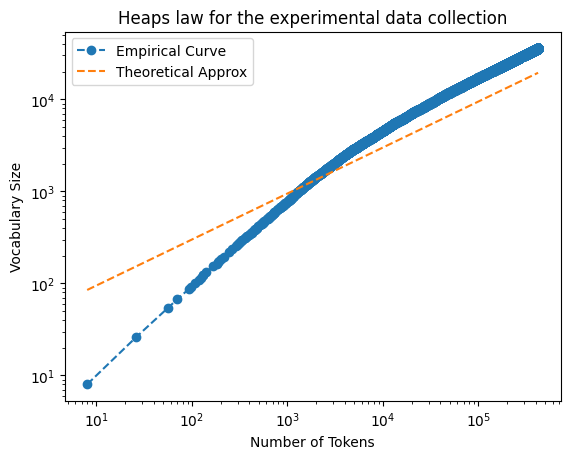

In [114]:
import matplotlib.pyplot as plt

vocabSize, tokenSize, theoreticalSize = [], [], []
vocab = set()
count, k, b = 0, 30, 0.5

for i in range(len(all_entries)):
    line = all_entries[i][1]
    token = str(line).split()
    for j in token:
        vocab.add(j)
        count = count + 1
    tokenSize.append(count)
    vocabSize.append(len(vocab))
    
for ntokens in tokenSize:
    theoreticalSize.append(k * (ntokens ** b))

plt.loglog(tokenSize, vocabSize, label="Empirical Curve", marker='o', linestyle='--')
plt.loglog(tokenSize, theoreticalSize, label="Theoretical Approx", linestyle='--')

plt.title("Heaps law for the experimental data collection")
plt.xlabel("Number of Tokens")
plt.ylabel("Vocabulary Size")
plt.legend()
plt.show()

In [115]:
data = [row[1] for row in all_entries]

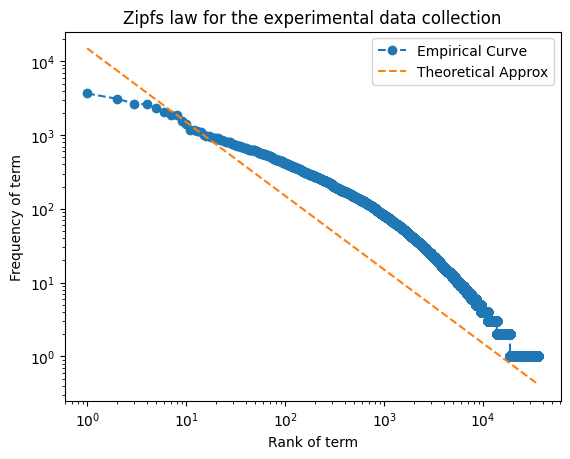

In [118]:
from collections import Counter

# zipf's law: the relationship between vocabulary ranks and frequencies is linear in
# log-log space: vfreq = k*vrank^b, with k depends on the collection size and b ~ -1.0

# For each term in the vocabulary compute term ranks and term frequencies and plot in a 
# log-log scale the empirical curve for term frequencies vs term ranks along with the
# expected theortical curve as decribed above (use k=15000 and b=-1.0)

tokens, ranks, frequencies = [], [], []
k, b = 15000, -1.0

for i in data:
    words = str(i).split()
    for j in words:
        tokens.append(j)

tokensSorted = sorted(Counter(tokens).items(), key=lambda i: i[1], reverse=True)
for i in range(1, len(tokensSorted) + 1):
    ranks.append(i)
for _, count in tokensSorted:
    frequencies.append(count)
    
ranks = np.array(ranks)
frequencies = np.array(frequencies)
theoFreq = k * ranks ** b

plt.loglog(ranks, frequencies, label="Empirical Curve", marker='o', linestyle='--')
plt.loglog(ranks, theoFreq, label="Theoretical Approx", linestyle='--')

plt.title('Zipfs law for the experimental data collection')
plt.xlabel('Rank of term')
plt.ylabel('Frequency of term')
plt.legend()
plt.show()

In [120]:
# Print the vocabulary terms in the top- and bottom-ranks (top 10 and bottom 10) 
print(f'Top 10:')
for term, count in tokensSorted[:10]:
    print(f'Term: {term}, Count: {count}')

print(f'\nBottom 10:')
for term, count in tokensSorted[-10:]:
    print(f'Term: {term}, Count: {count}')

Top 10:
Term: u, Count: 3665
Term: say, Count: 3104
Term: trump, Count: 2673
Term: nan, Count: 2602
Term: new, Count: 2297
Term: ukraine, Count: 2065
Term: china, Count: 1898
Term: russia, Count: 1844
Term: russian, Count: 1543
Term: world, Count: 1392

Bottom 10:
Term: 1xbet, Count: 1
Term: rennes, Count: 1
Term: unproposed, Count: 1
Term: harass, Count: 1
Term: exconvict, Count: 1
Term: endoframadan, Count: 1
Term: weeklong, Count: 1
Term: jeanius, Count: 1
Term: krenglish, Count: 1
Term: teesside, Count: 1


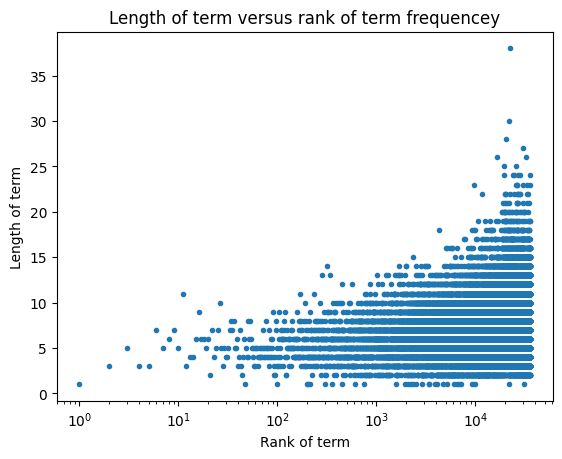

In [122]:
# As seen from the cell above, top ranked terms are shorter (in number of characters) than
# those terms in the tail of the rank. Is this a general trend?

# Compute term lengths (in number of characters) for all terms in the vocabulary and generate 
# a scatter plot of term lengths vs their ranks (use a semi-logx scale for your plot).
# What conclusions can you derive?

termLen = []
for term, _ in tokensSorted:
    termLen.append(len(term))

plt.semilogx(ranks, termLen, '.')
plt.yscale('linear')
plt.xscale('log') 
plt.title('Length of term versus rank of term frequencey')
plt.xlabel('Rank of term')
plt.ylabel('Length of term')
plt.show()

In [124]:
# Find the longest term by comparing lengths
longest_term = max(tokensSorted, key=lambda x: len(x[0]))

# longest_term will be a tuple (term, frequency)
print(f"The longest term is '{longest_term[0]}' with a length of {len(longest_term[0])} characters.")

The longest term is 'saaaaddddddddddddddddddddddddddddddddd' with a length of 38 characters.


In [126]:
longest_term

('saaaaddddddddddddddddddddddddddddddddd', 1)